In [2]:
import urllib
import cv2 as cv2
import numpy as np

url = "https://res.cloudinary.com/dp0ayty6p/image/upload/v1705428765/my/img1.jpg"
url_response = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, -1)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')

HTTPError: HTTP Error 404: Not Found

In [28]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [29]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [23]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [38]:
x, y, w, h =  face[0]
imgcr = img[y:y+h, x:x+w]


(-0.5, 78.5, 78.5, -0.5)

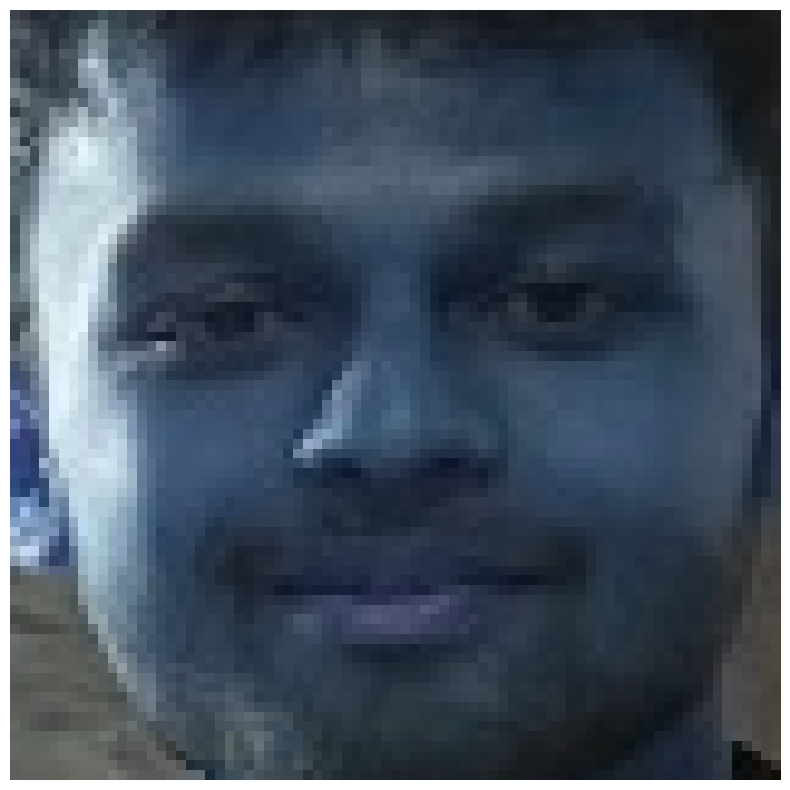

In [39]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(imgcr)
plt.axis('off')

### Full Code

In [1]:
!pip install face-recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 11.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-linux_x86_64.whl size=3828877 sha256=7d80f2dd59a51853085ba268111eb26cde929871a89493f7f59f7a230367f434
  Stored in directory: /root/.cache/pip/wheels/9b/e2/80/888fdc098db86b463ff0c83ae5e5ca151889e901bc1e9a3a11
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=e13313c75f355f01026bc55a2fc9c6dfd9efd624d47ed0da86f4102f19e42b79
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built dlib face-recognition-models


In [ ]:
import cv2
import face_recognition

# Load known faces
known_faces_path = "/kaggle/input/face-sample/known faces"
known_faces = []
faceList =["Kenneth"]

# Iterate through files in the "known_faces" folder
for filename in os.listdir(known_faces_path):
    image_path = os.path.join(known_faces_path, filename)
    image = face_recognition.load_image_file(image_path)
    encoding = face_recognition.face_encodings(image)[0]
    known_faces.append(encoding)

# Open the video file (change "your_video.mp4" to your actual video file)
video_file = "https://res.cloudinary.com/dp0ayty6p/video/upload/v1705433352/samples/FACESAMPLEvid.mp4"
video_capture = cv2.VideoCapture(video_file)

# Get video properties
fps = int(video_capture.get(cv2.CAP_PROP_FPS))
width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # You can use other codecs like 'XVID' or 'MJPG'
output_file = "output_video.mp4"
video_writer = cv2.VideoWriter(output_file, fourcc, fps, (width, height))
while True:
    # Capture each frame from the video feed
    ret, frame = video_capture.read()

    # Break the loop if the video is over
    if not ret:
        break
    print(counter)
    # Find all face locations and face encodings in the current frame
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    # Loop through each face found in the frame
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Check if the face matches any known faces
        matches = face_recognition.compare_faces(known_faces, face_encoding)
        name = "Unknown"

        # If a match is found, use the name of the first known face
        if True in matches:
            first_match_index = matches.index(True)
            name = faceList[first_match_index]

        # Draw a rectangle around the face and display the name
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.7, (255, 255, 255), 1)

    # Write the frame to the output video file
    video_writer.write(frame)

# Release the video capture, writer, and close all windows
video_capture.release()
video_writer.release()


(-0.5, 1135.5, 1418.5, -0.5)

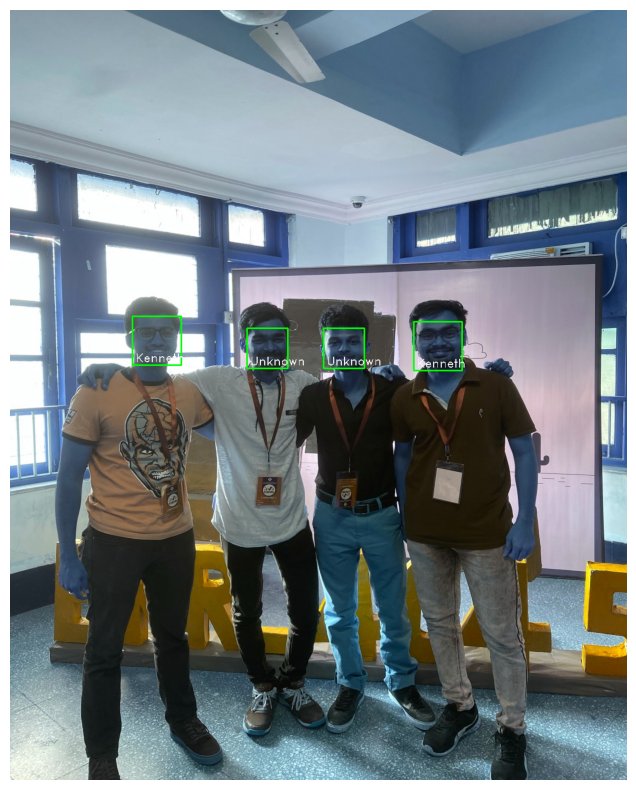

In [12]:
import cv2
import face_recognition
import os
import numpy as np
import urllib
import matplotlib.pyplot as plt

known_faces_path = "/kaggle/input/face-sample/known faces"
known_faces = []
faceList =["Kenneth"]

# Iterate through files in the "known_faces" folder
for filename in os.listdir(known_faces_path):
    image_path = os.path.join(known_faces_path, filename)
    image = face_recognition.load_image_file(image_path)
    encoding = face_recognition.face_encodings(image)[0]
    known_faces.append(encoding)

# Open webcam (change the index if you have multiple cameras)


url = "https://res.cloudinary.com/dp0ayty6p/image/upload/v1705428765/samples/facesample.jpg"
url_response = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
frame = cv2.imdecode(img_array, -1)


face_locations = face_recognition.face_locations(frame)
face_encodings = face_recognition.face_encodings(frame, face_locations)

# Loop through each face found in the frame
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # Check if the face matches any known faces
    matches = face_recognition.compare_faces(known_faces, face_encoding)
    name = "Unknown"

    # If a match is found, use the name of the first known face
    if True in matches:
        first_match_index = matches.index(True)
        name = faceList[first_match_index]

    # Draw a rectangle around the face and display the name
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.7, (255, 255, 255), 1)

# Display the resulting frame
plt.figure(figsize=(20,10))

plt.imshow(frame)
plt.axis('off')

